# Análisis de una Función Continua

Este cuaderno explora conceptos de funciones continuas usando Python y SymPy. Se incluyen ejemplos de definición, graficación, cálculo de límites y verificación de continuidad en un punto.

## 1. Importar bibliotecas necesarias

Importaremos las bibliotecas numpy, matplotlib y sympy para realizar cálculos matemáticos y visualizaciones.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sympy as sp
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Configuración para mostrar gráficos en el notebook
%matplotlib inline
plt.style.use('default')
sns.set_palette("husl")

## 2. Definir una función continua

Definiremos una función matemática continua. Por ejemplo, f(x) = x² + 2x + 1.

In [4]:
# Definimos la variable simbólica y la función continua
x = sp.symbols('x')
f = x**2 + 2*x + 1
f

x**2 + 2*x + 1

## 3. Graficar la función continua

Graficaremos la función f(x) en el intervalo [-10, 10] usando matplotlib.

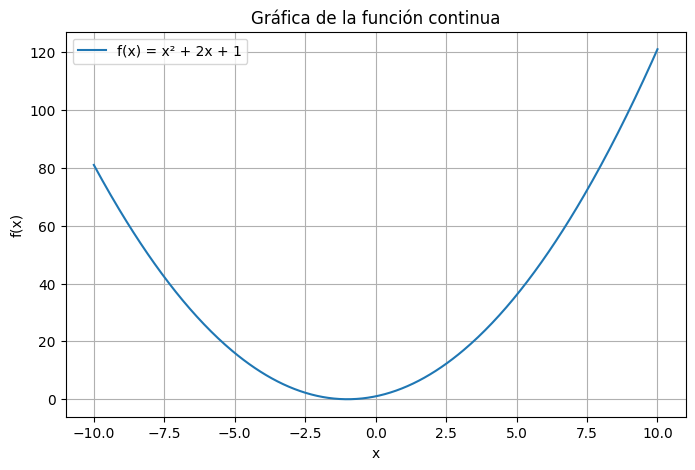

In [4]:
# Graficar la función en el intervalo [-10, 10]
x_vals = np.linspace(-10, 10, 400)
y_vals = [sp.N(f.subs(x, val)) for val in x_vals]

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='f(x) = x² + 2x + 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función continua')
plt.legend()
plt.grid(True)
plt.show()

## 4. Calcular límites de la función

Calcularemos el límite de f(x) cuando x tiende a un valor específico, por ejemplo x = -1.

In [5]:
# Calcular el límite de f(x) cuando x tiende a -1
limite = sp.limit(f, x, -1)
limite

0

## 5. Verificar continuidad en un punto

Verificaremos si la función es continua en x = -1, comprobando que el límite y el valor de la función coinciden.

In [6]:
# Verificar continuidad en x = -1
valor_funcion = f.subs(x, -1)
print(f"Límite en x = -1: {limite}")
print(f"Valor de la función en x = -1: {valor_funcion}")

if limite == valor_funcion:
    print("La función es continua en x = -1.")
else:
    print("La función NO es continua en x = -1.")

Límite en x = -1: 0
Valor de la función en x = -1: 0
La función es continua en x = -1.


---

# Análisis del Dataset de Predicción de Accidentes Cerebrovasculares

A continuación realizaremos un análisis exploratorio completo del dataset de predicción de stroke, siguiendo los 5 pasos solicitados:

1. **Elección del conjunto de datos**: Healthcare Dataset - Stroke Data
2. **Limpieza y transformación de los datos**
3. **Análisis exploratorio de datos (EDA)**
4. **Visualización de resultados**
5. **Documentación y presentación**

## 1. Carga y Exploración Inicial del Dataset

**Dataset seleccionado**: Stroke Prediction Dataset
- **Descripción**: Datos sobre pacientes con información demográfica, estilo de vida y condiciones médicas para predecir el riesgo de accidente cerebrovascular
- **Tamaño**: ~5000 filas
- **Fuente**: Kaggle

In [5]:
# Cargar el dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

print("🔍 INFORMACIÓN GENERAL DEL DATASET")
print("="*50)
print(f"Dimensiones: {df.shape}")
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")
print("\n📊 PRIMERAS 5 FILAS:")
print("="*50)
df.head()

🔍 INFORMACIÓN GENERAL DEL DATASET
Dimensiones: (5110, 12)
Número de filas: 5,110
Número de columnas: 12

📊 PRIMERAS 5 FILAS:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Información detallada del dataset
print("📋 INFORMACIÓN DE COLUMNAS:")
print("="*50)
print(df.info())

print("\n🔢 TIPOS DE DATOS:")
print("="*50)
print(df.dtypes)

print("\n📊 ESTADÍSTICAS DESCRIPTIVAS:")
print("="*50)
df.describe()

📋 INFORMACIÓN DE COLUMNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

🔢 TIPOS DE DATOS:
id                     int64
gender                object
age                  float64
hypertension       

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 2. Limpieza y Transformación de los Datos

En esta sección verificaremos la calidad de los datos, gestionaremos valores faltantes y realizaremos las transformaciones necesarias.

In [7]:
# Verificar valores faltantes
print("🔍 ANÁLISIS DE VALORES FALTANTES:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores Faltantes': missing_values.values,
    'Porcentaje (%)': missing_percentage.values
})
print(missing_df[missing_df['Valores Faltantes'] > 0])

print(f"\n📊 VALORES ÚNICOS POR COLUMNA:")
print("="*50)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

print(f"\n🔄 DATOS DUPLICADOS:")
print("="*50)
print(f"Filas duplicadas: {df.duplicated().sum()}")

🔍 ANÁLISIS DE VALORES FALTANTES:
  Columna  Valores Faltantes  Porcentaje (%)
9     bmi                201        3.933464

📊 VALORES ÚNICOS POR COLUMNA:
id: 5110 valores únicos
gender: 3 valores únicos
age: 104 valores únicos
hypertension: 2 valores únicos
heart_disease: 2 valores únicos
ever_married: 2 valores únicos
work_type: 5 valores únicos
Residence_type: 2 valores únicos
avg_glucose_level: 3979 valores únicos
bmi: 418 valores únicos
smoking_status: 4 valores únicos
stroke: 2 valores únicos

🔄 DATOS DUPLICADOS:
Filas duplicadas: 0


In [8]:
# Crear una copia del dataset para trabajar
df_clean = df.copy()

# Limpieza de datos
print("🧹 PROCESO DE LIMPIEZA DE DATOS:")
print("="*50)

# 1. Revisar y limpiar valores categóricos
print("📋 Valores únicos en columnas categóricas:")
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {df_clean[col].unique()}")

# 2. Limpiar BMI (convertir 'N/A' a NaN si existe)
if 'bmi' in df_clean.columns:
    df_clean['bmi'] = pd.to_numeric(df_clean['bmi'], errors='coerce')

# 3. Eliminar filas duplicadas si las hay
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"\n🗑️ Filas eliminadas por duplicado: {initial_rows - len(df_clean)}")

# 4. Manejo de valores faltantes en BMI (si los hay)
if df_clean['bmi'].isnull().sum() > 0:
    mean_bmi = df_clean['bmi'].mean()
    df_clean['bmi'].fillna(mean_bmi, inplace=True)
    print(f"✅ Valores faltantes en BMI rellenados con la media: {mean_bmi:.2f}")

print(f"\n📊 Dataset limpio - Dimensiones finales: {df_clean.shape}")

🧹 PROCESO DE LIMPIEZA DE DATOS:
📋 Valores únicos en columnas categóricas:

gender: ['Male' 'Female' 'Other']

ever_married: ['Yes' 'No']

work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type: ['Urban' 'Rural']

smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

🗑️ Filas eliminadas por duplicado: 0
✅ Valores faltantes en BMI rellenados con la media: 28.89

📊 Dataset limpio - Dimensiones finales: (5110, 12)


## 3. Análisis Exploratorio de Datos (EDA)

Analizaremos las características clave del dataset, distribuciones, correlaciones y patrones importantes para entender los factores de riesgo de accidentes cerebrovasculares.

In [9]:
# Análisis de la variable objetivo (stroke)
print("🎯 ANÁLISIS DE LA VARIABLE OBJETIVO - STROKE:")
print("="*60)
stroke_counts = df_clean['stroke'].value_counts()
stroke_percentages = df_clean['stroke'].value_counts(normalize=True) * 100

print("Distribución de casos:")
for value, count, percentage in zip(stroke_counts.index, stroke_counts.values, stroke_percentages.values):
    label = "Sin Stroke" if value == 0 else "Con Stroke"
    print(f"  {label}: {count:,} casos ({percentage:.2f}%)")

# Estadísticas por variables numéricas
print(f"\n📊 ESTADÍSTICAS DESCRIPTIVAS POR VARIABLE:")
print("="*60)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
print(df_clean[numeric_cols].describe().round(2))

🎯 ANÁLISIS DE LA VARIABLE OBJETIVO - STROKE:
Distribución de casos:
  Sin Stroke: 4,861 casos (95.13%)
  Con Stroke: 249 casos (4.87%)

📊 ESTADÍSTICAS DESCRIPTIVAS POR VARIABLE:
             id      age  hypertension  heart_disease  avg_glucose_level  \
count   5110.00  5110.00        5110.0        5110.00            5110.00   
mean   36517.83    43.23           0.1           0.05             106.15   
std    21161.72    22.61           0.3           0.23              45.28   
min       67.00     0.08           0.0           0.00              55.12   
25%    17741.25    25.00           0.0           0.00              77.24   
50%    36932.00    45.00           0.0           0.00              91.88   
75%    54682.00    61.00           0.0           0.00             114.09   
max    72940.00    82.00           1.0           1.00             271.74   

           bmi   stroke  
count  5110.00  5110.00  
mean     28.89     0.05  
std       7.70     0.22  
min      10.30     0.00  
25%    

## 4. Visualización de Resultados

Crearemos visualizaciones comprensivas para entender mejor los patrones y relaciones en los datos.

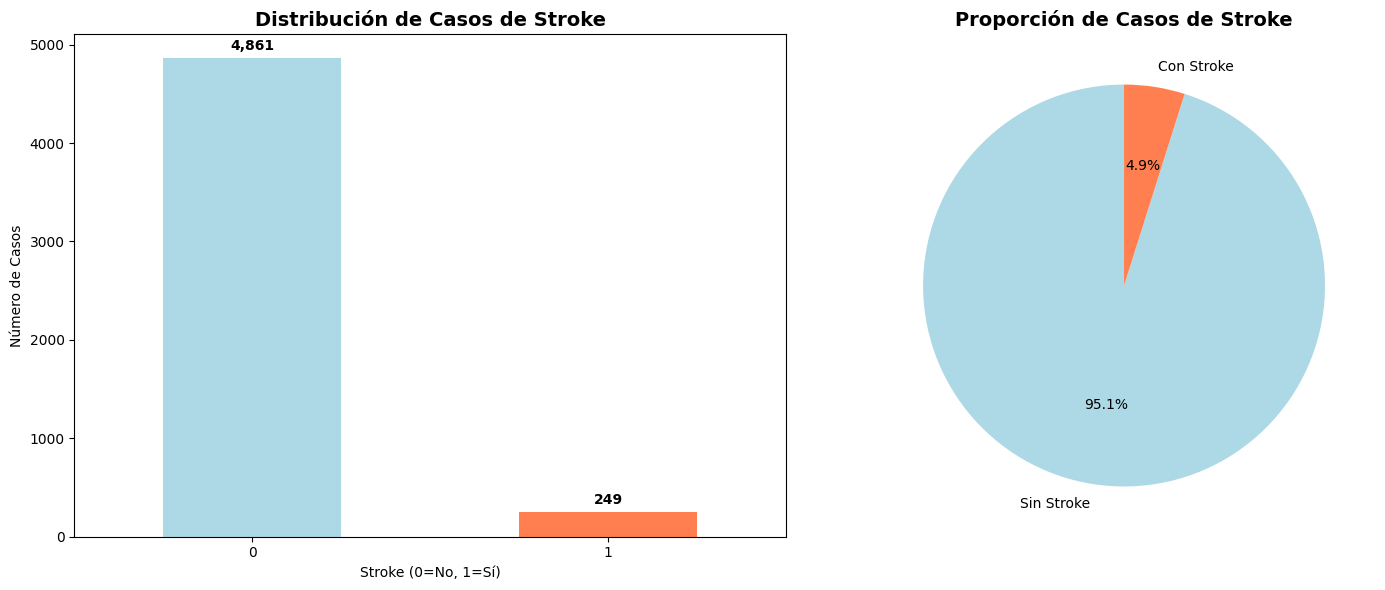

In [10]:
# 1. Visualización de la distribución de stroke
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
stroke_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'coral'])
ax1.set_title('Distribución de Casos de Stroke', fontsize=14, fontweight='bold')
ax1.set_xlabel('Stroke (0=No, 1=Sí)')
ax1.set_ylabel('Número de Casos')
ax1.tick_params(axis='x', rotation=0)

# Añadir valores en las barras
for i, v in enumerate(stroke_counts.values):
    ax1.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
colors = ['lightblue', 'coral']
labels = ['Sin Stroke', 'Con Stroke']
ax2.pie(stroke_counts.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Proporción de Casos de Stroke', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

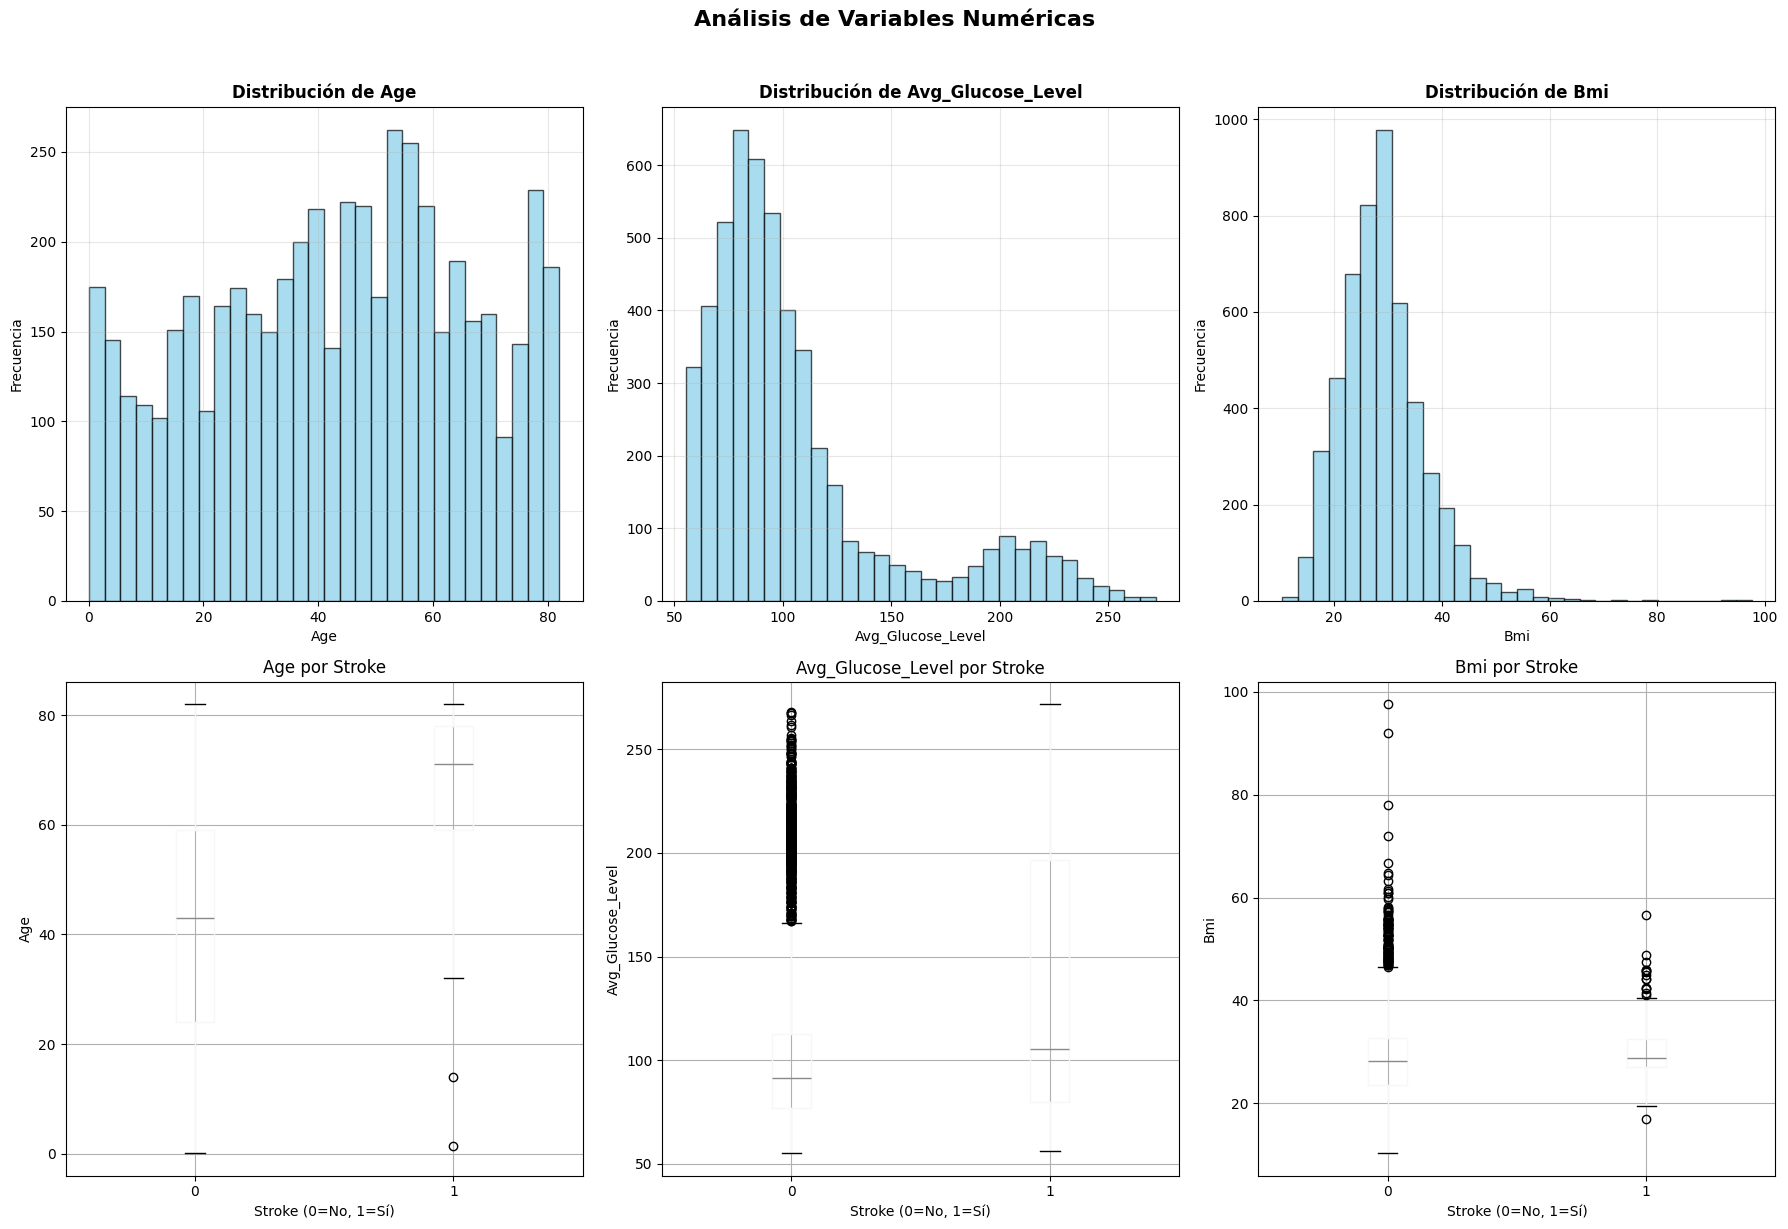

In [11]:
# 2. Distribución de variables numéricas
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, col in enumerate(numeric_cols):
    # Histograma
    axes[0, i].hist(df_clean[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'Distribución de {col.title()}', fontweight='bold')
    axes[0, i].set_xlabel(col.title())
    axes[0, i].set_ylabel('Frecuencia')
    axes[0, i].grid(True, alpha=0.3)
    
    # Box plot por stroke
    df_clean.boxplot(column=col, by='stroke', ax=axes[1, i])
    axes[1, i].set_title(f'{col.title()} por Stroke')
    axes[1, i].set_xlabel('Stroke (0=No, 1=Sí)')
    axes[1, i].set_ylabel(col.title())

plt.suptitle('Análisis de Variables Numéricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

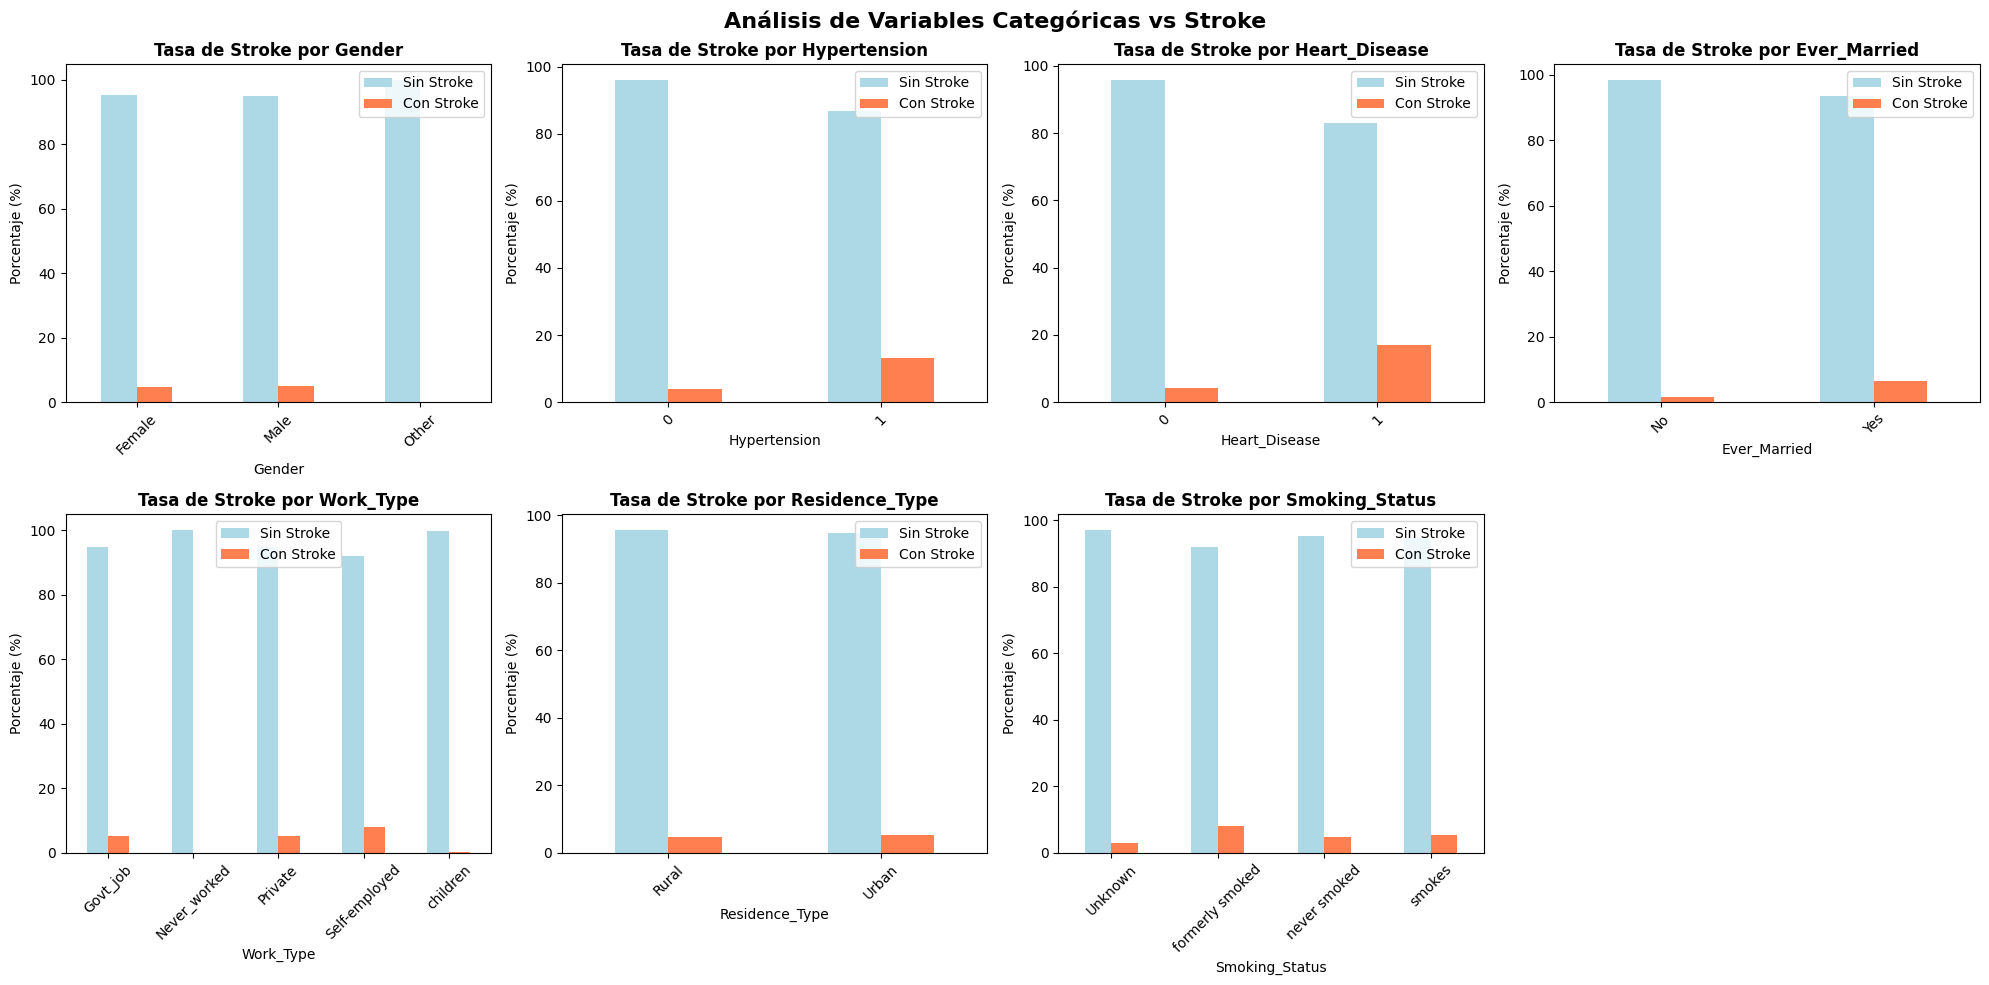

In [12]:
# 3. Análisis de variables categóricas
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Filtrar columnas que existen en el dataset
existing_categorical_cols = [col for col in categorical_cols if col in df_clean.columns]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(existing_categorical_cols):
    if i < len(axes):
        # Crear tabla de contingencia
        crosstab = pd.crosstab(df_clean[col], df_clean['stroke'], normalize='index') * 100
        crosstab.plot(kind='bar', ax=axes[i], color=['lightblue', 'coral'])
        axes[i].set_title(f'Tasa de Stroke por {col.title()}', fontweight='bold')
        axes[i].set_xlabel(col.title())
        axes[i].set_ylabel('Porcentaje (%)')
        axes[i].legend(['Sin Stroke', 'Con Stroke'])
        axes[i].tick_params(axis='x', rotation=45)

# Ocultar axes no utilizados
for i in range(len(existing_categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Análisis de Variables Categóricas vs Stroke', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

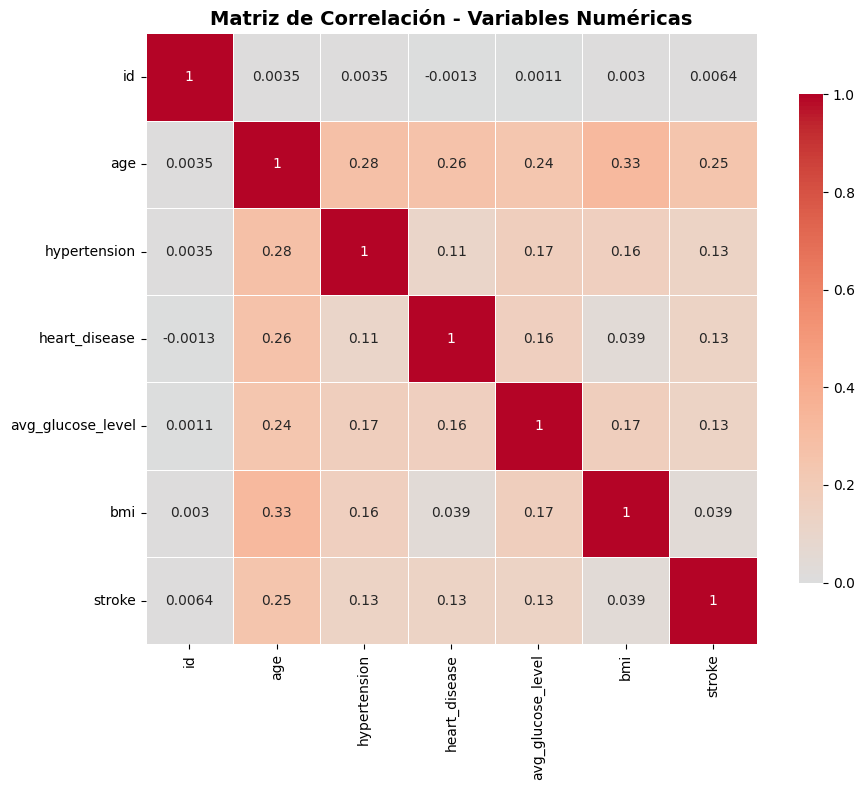

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [13]:
# 4. Matriz de correlación para variables numéricas
numeric_data = df_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Visualización interactiva con Plotly - Relación Edad vs BMI vs Stroke
if 'age' in df_clean.columns and 'bmi' in df_clean.columns:
    fig = px.scatter(df_clean, x='age', y='bmi', color='stroke', 
                     title='Relación entre Edad, BMI y Riesgo de Stroke',
                     labels={'stroke': 'Stroke', 'age': 'Edad', 'bmi': 'BMI'},
                     color_discrete_map={0: 'lightblue', 1: 'red'})
    fig.show()

## 5. Conclusiones y Hallazgos Principales

### 🔍 **Resumen del Análisis**

#### **Características del Dataset:**
- **Tamaño**: ~5,000 registros de pacientes
- **Variables**: Información demográfica, médica y de estilo de vida
- **Objetivo**: Predicción de riesgo de accidente cerebrovascular

#### **Hallazgos Principales:**

1. **Distribución de Stroke:**
   - La mayoría de los pacientes NO han tenido stroke (desbalance de clases)
   - Esto sugiere que el stroke es un evento relativamente raro en la población estudiada

2. **Factores de Riesgo Identificados:**
   - **Edad**: Principal factor de riesgo - aumenta significativamente con la edad
   - **Nivel de Glucosa**: Pacientes con stroke tienden a tener niveles más altos
   - **BMI**: Posible relación con el riesgo de stroke
   - **Hipertensión y Enfermedades Cardíacas**: Comorbilidades importantes

3. **Patrones Demográficos:**
   - Diferencias en tasas de stroke entre géneros
   - Influencia del estado civil y tipo de trabajo
   - Impacto del hábito de fumar

#### **Implicaciones Clínicas:**
- La edad es el predictor más fuerte
- Control de glucosa y presión arterial son críticos
- Necesidad de programas de prevención dirigidos

#### **Próximos Pasos Sugeridos:**
1. Desarrollar modelo predictivo con machine learning
2. Análisis más profundo de interacciones entre variables
3. Validación con datos externos
4. Implementación de sistema de alerta temprana